# Exploratory Data Analysis 

Australian Energy Market Operator Data for the year 2018 for Queensland

In [1]:
#import libraries
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime,timedelta
import random
from scipy.signal import periodogram
import utils


This dataset contains both the rpice and demand data, on a half hourly basis for each day. Therefore, a group of 48 observations form a time interval of 24 hrs

In [2]:
#datasets
#dataset
dataframe_jan = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201801_QLD1.csv')
dataframe_feb = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201802_QLD1.csv')
dataframe_march = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201803_QLD1.csv')
dataframe_april = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201804_QLD1.csv')
dataframe_may = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201805_QLD1.csv')
dataframe_june = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201806_QLD1.csv')
dataframe_july = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201807_QLD1.csv')
dataframe_aug = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201808_QLD1.csv')
dataframe_sep = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201809_QLD1.csv')
dataframe_oct = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201810_QLD1.csv')
dataframe_nov = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201811_QLD1.csv')
dataframe_dec = pd.read_csv('C:\\Users\\dell i\\Desktop\\Academics\\MTech Project\\price forecasting\\data\\PRICE_AND_DEMAND_201812_QLD1.csv')

#Price data
frames = [dataframe_jan,dataframe_feb,dataframe_march,dataframe_april,dataframe_may,dataframe_june,dataframe_july,dataframe_aug,dataframe_sep,dataframe_oct,dataframe_nov]
full_dataframe = pd.concat(frames)
full_dataframe = full_dataframe.drop(columns = ['REGION','PERIODTYPE'],axis = 1)
full_dataframe['SETTLEMENTDATE'] =  pd.to_datetime(full_dataframe['SETTLEMENTDATE'])
price_series = full_dataframe.drop(columns = ['TOTALDEMAND'],axis = 1)
price_series = price_series.set_index(['SETTLEMENTDATE'])



In [3]:
#Observing the given series
price_series.head(30)

,RRP
SETTLEMENTDATE,
2018-01-01 00:30:00,81.27
2018-01-01 01:00:00,78.02
2018-01-01 01:30:00,65.02
2018-01-01 02:00:00,64.85
2018-01-01 02:30:00,64.23
2018-01-01 03:00:00,63.36
2018-01-01 03:30:00,64.03
2018-01-01 04:00:00,61.29
2018-01-01 04:30:00,60.04


In [4]:
#Information about the given series
price_series.describe()



,RRP
count,16032.000000
mean,74.409570
std,45.588211
min,-308.310000
25%,57.000000
50%,64.945000
75%,84.512500
max,2467.640000


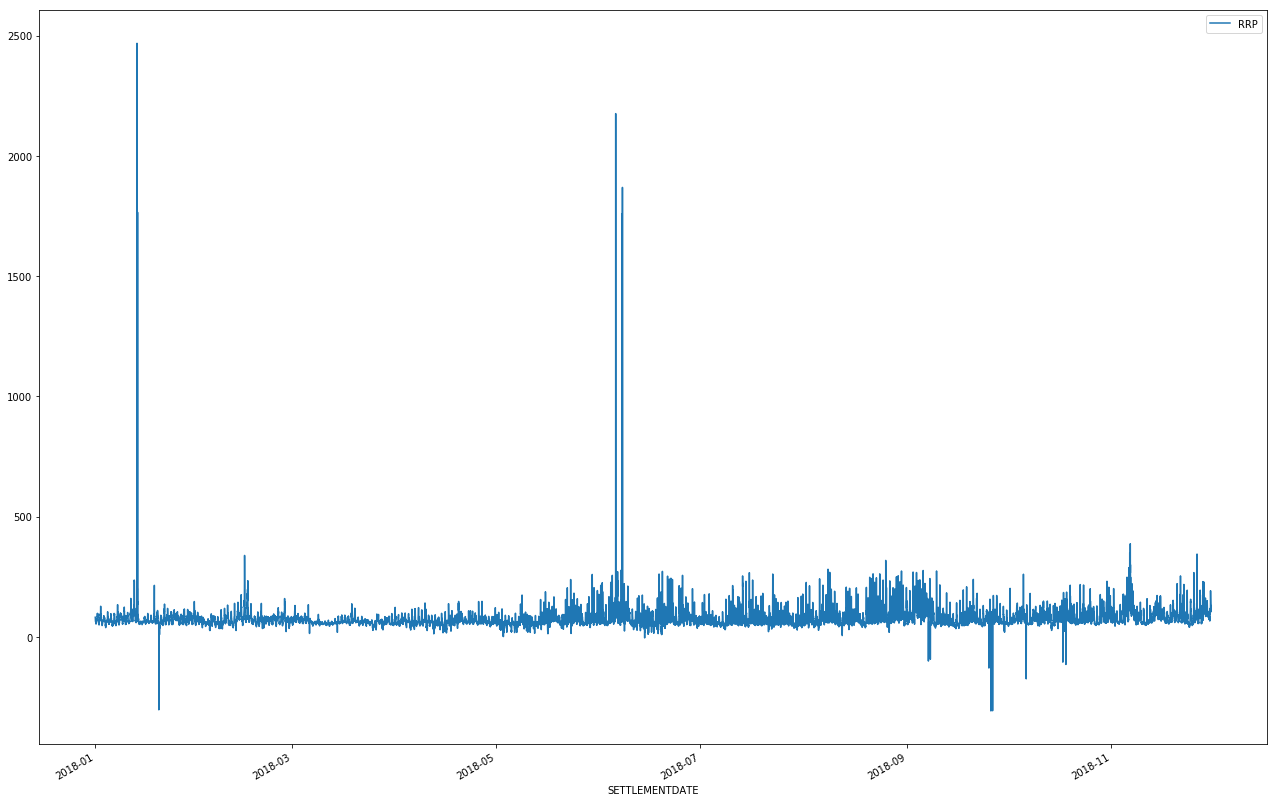

In [5]:
#plotting the whole series
price_series.plot(figsize = (22,15))
plt.show()

We see two high peaks in the given time series, given maximum is 2467.64$,
RRP has also gone down below zero

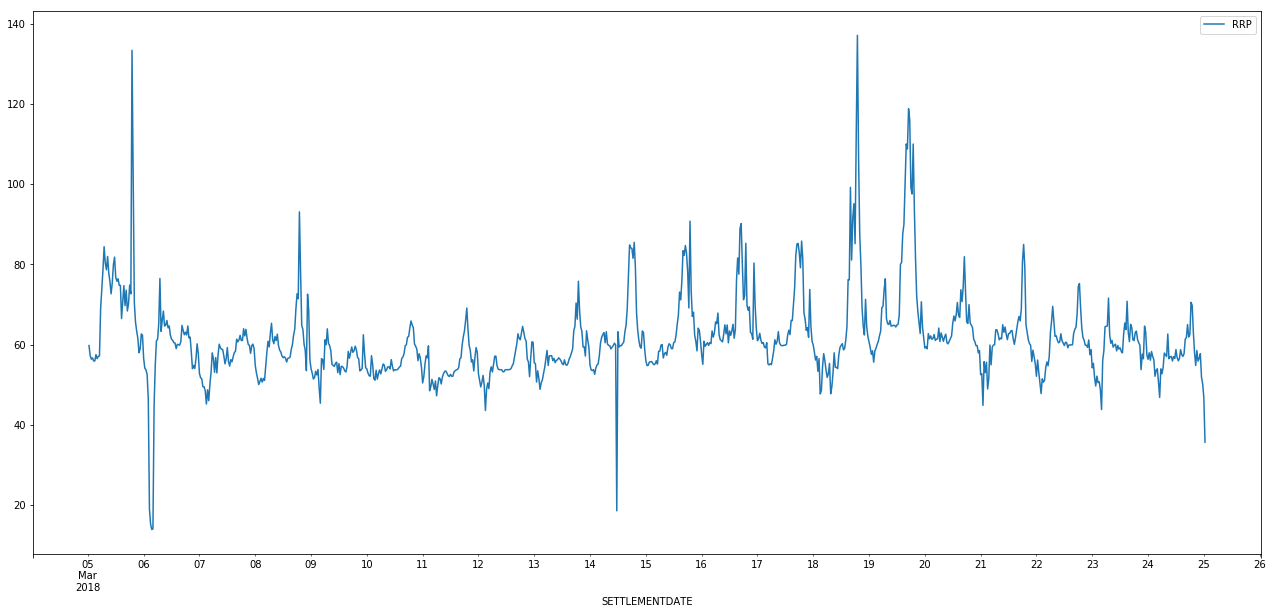

In [6]:
#Plotting the given time series for a given period
start_date = datetime(2018,3,5,0,30,0)
period = 20  # observing prices for a period of 10 days
end_date = start_date + timedelta(days = period)
price_series[start_date:end_date].plot(figsize = (22,10))
plt.legend()
plt.show()

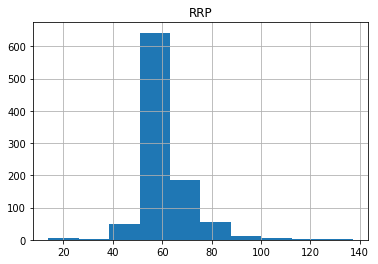

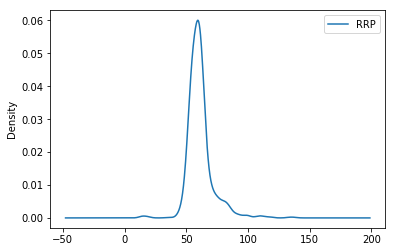

In [7]:
#plotting histogram and kernel density function for the given time series
price_series[start_date:end_date].hist()
price_series[start_date:end_date].plot.density()
plt.show()


On seeing the series, it seems there is only a seasonal component which occurs every 12 hours, there may be a trend component.

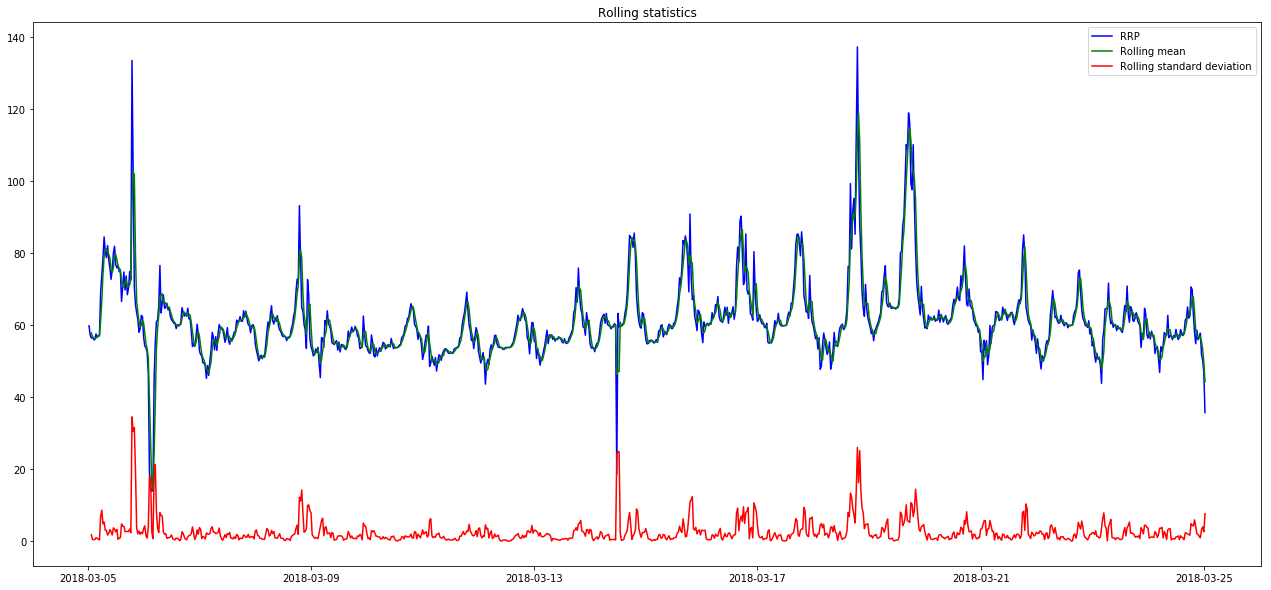

In [8]:
#Rolling statistics of given time series
utils.plot_rolling_stats(price_series[start_date:end_date])

Series maybe non-stationary, after we see the rolling statistics

In [9]:
#ADF test for staionarity
print('Results of Dickey Fuller Test:')
dftest = adfuller(price_series['RRP'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.116248e+01
p-value                        2.765817e-20
#Lags Used                     4.300000e+01
Number of Observations Used    1.598800e+04
Critical Value (1%)           -3.430759e+00
Critical Value (5%)           -2.861721e+00
Critical Value (10%)          -2.566866e+00
dtype: float64


From the ADF test, we do not need any differencing of data, or the first order differencing may be used, seeing the rolling stats, there is seasonality in the series

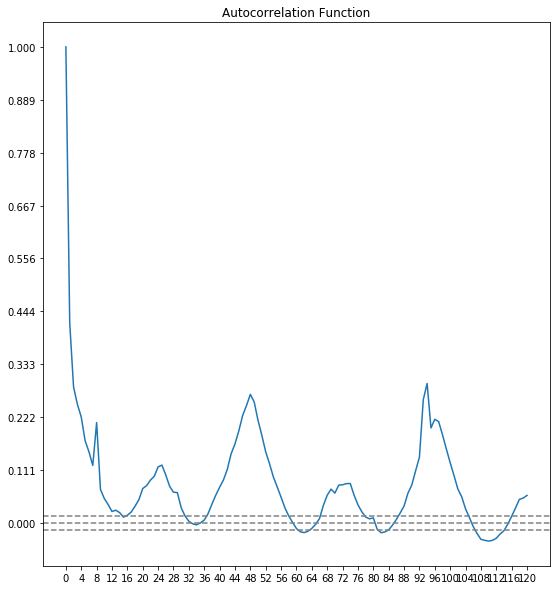

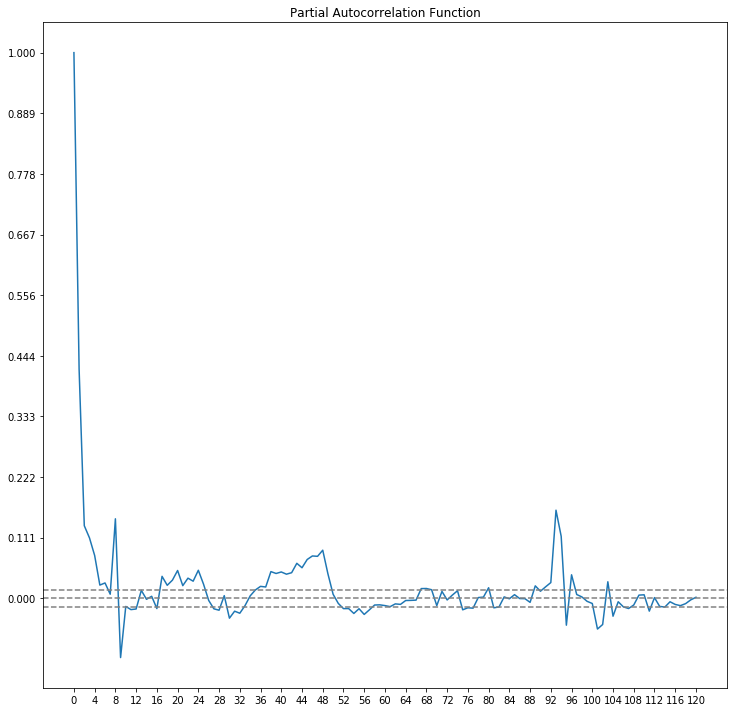

In [7]:
#autocorrelation and partial autocorrelation functions
#Critical values at lag 0 are used as confidence intervals, at subsequent lags, the confidence interval increases
utils.plot_acf_pacf(price_series,n_lags = 120)



Due to seasonality, autocorrelation becomes high at regular intervals, perioid of seasonality is 24 half hours or 12 hours, we will take it as 24

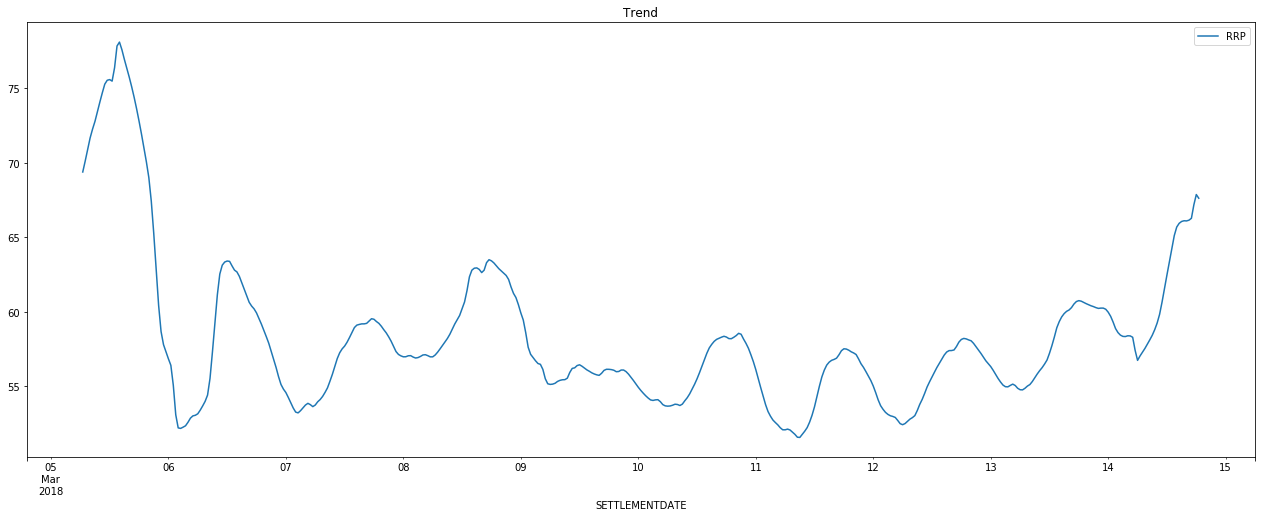

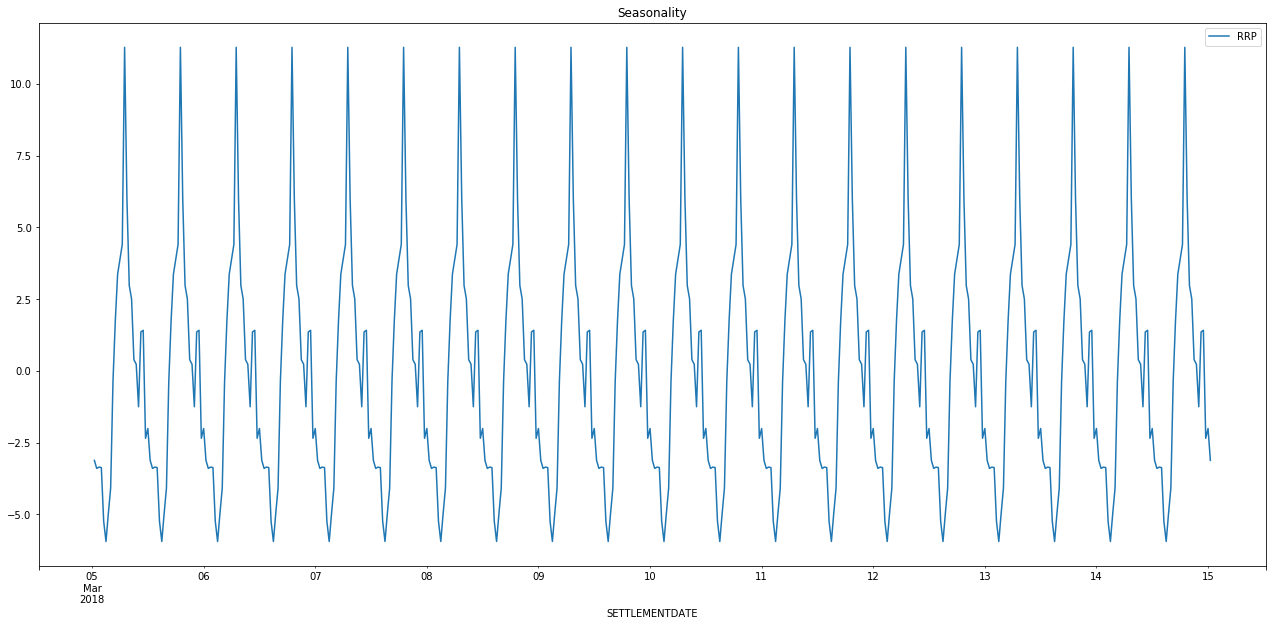

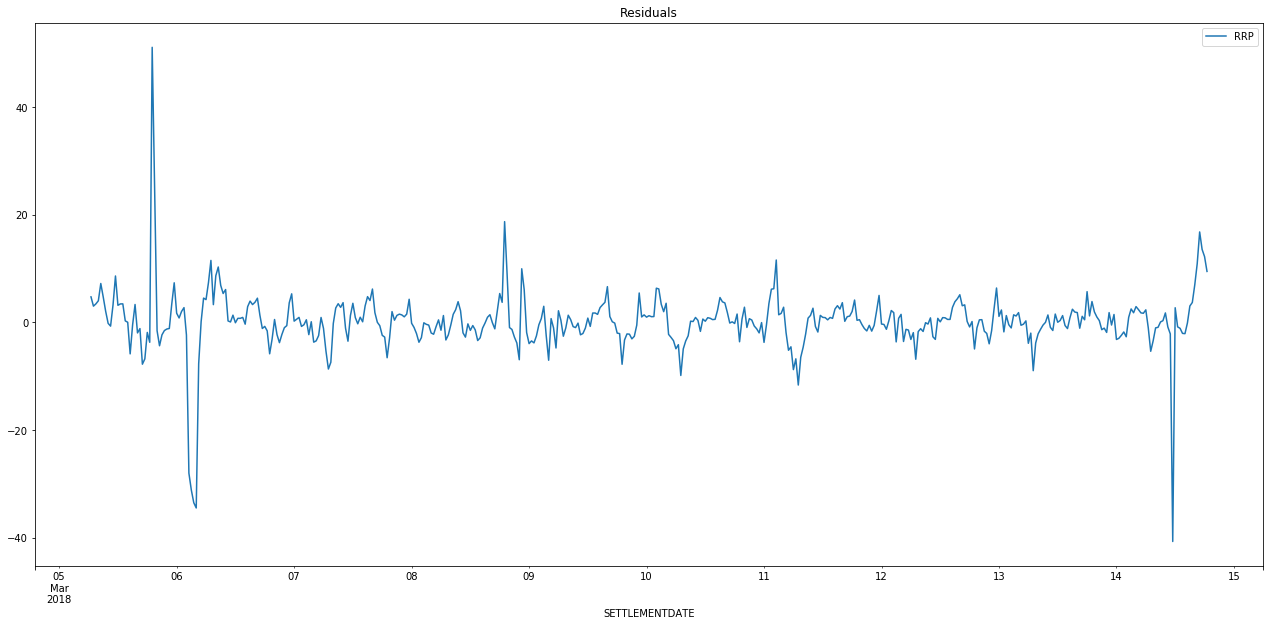

In [11]:
#decompose time series into trend,seasonal and residual components
decomposition = seasonal_decompose(price_series[start_date:end_date],freq = 24,model = 'additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend.dropna().plot(figsize = (22,8),title = "Trend")
seasonal.dropna().plot(figsize = (22,10), title = "Seasonality")
residual.dropna().plot(figsize = (22,10),title = "Residuals")
plt.show()

Our sampling time is 30 mins which is 0.00055556 Hz

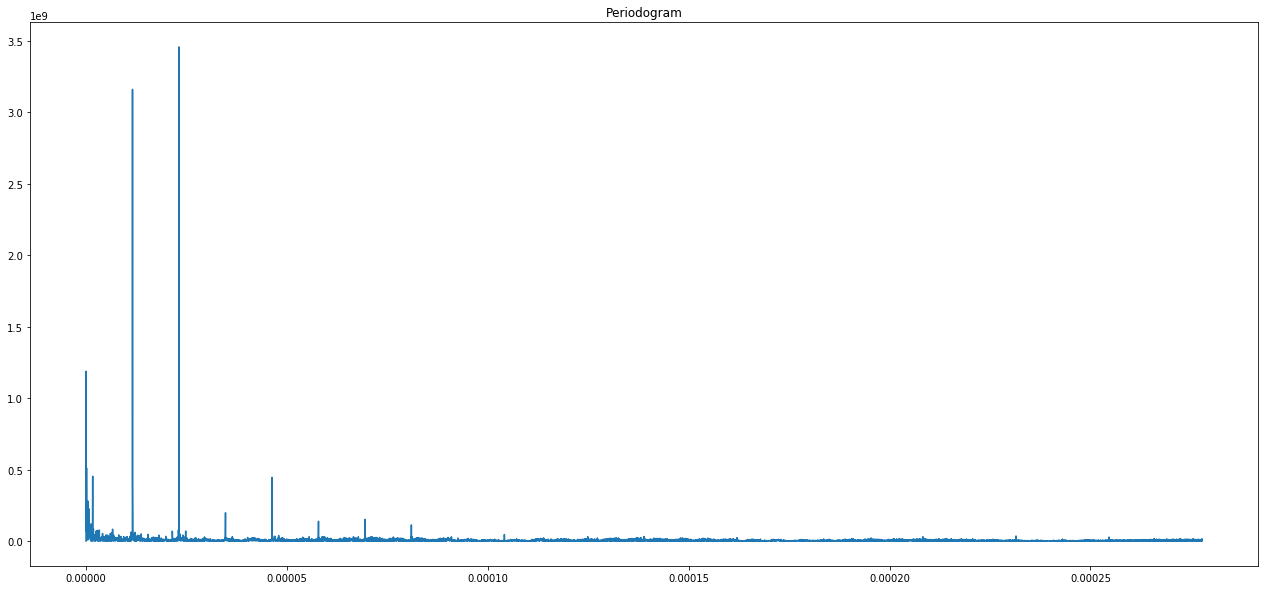

In [4]:
#plotting periodgram of the time series to find period(s) of seasonality
freq,power_spectral_densities = periodogram(price_series['RRP'],fs = 0.00055556)
plt.figure(figsize = (22,10))
plt.plot(freq,power_spectral_densities)
plt.title("Periodogram")
plt.show()

From the above spectral analysis, there are two dominant frequencies in our time series

In [6]:
#seasonality periods as observed in the given series
indices = np.flip(np.argsort(power_spectral_densities))[:2]
period_1 = 1/(3600*freq[indices[0]])
period_2 = 1/(3600*freq[indices[1]])
print("Observed seasonalities are of periods " + str(period_1) + " hours " + str(period_2) + " hours respectively" )

Observed seasonalities are of periods 11.999904000767993 hours 23.999808001535985 hours respectively


The seasonalities are of periods 12 hours and 24 hours respectively